# Datenvisualisierung in Python

## Laden der erforderlichen Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
import plotly.graph_objects as go

## Import des Datensatzes

Die folgenden Übungen basieren auf den Ausgaben des Bundes für den
Zeitraum von 1990 bis 2027.

In [3]:
df_bundesfinanzen = pd.read_csv('./data/240627_bundesausgaben_timeline.csv')
print(df_bundesfinanzen.head())

   Jahr  Bildung und Forschung  Finanzen und Steuern    Sicherheit  \
0  1990           2.915631e+09          4.284407e+09  6.232319e+09   
1  1991           3.196256e+09          4.556436e+09  6.403684e+09   
2  1992           3.463842e+09          5.520356e+09  6.469725e+09   
3  1993           3.588631e+09          5.211826e+09  5.989260e+09   
4  1994           3.708234e+09          6.271460e+09  6.180145e+09   

   Soziale Wohlfahrt       Verkehr  
0       6.875148e+09  4.626737e+09  
1       8.091567e+09  5.372566e+09  
2       8.615627e+09  5.541553e+09  
3       1.129834e+10  6.127085e+09  
4       1.069757e+10  6.044093e+09  


## Teile eines Ganzen

* Kuchen
* Tree Map
* Horizontale (sortierte) Balken


### Pie Chart

#### Extraktion der erforderlichen Daten

In [7]:
y2023 = df_bundesfinanzen.iloc[37].tolist()
print(f'Rohdaten 2023: {y2023}')
y2023 = y2023[1:]
print(f'Bereinigte Daten 2023: {y2023}')

Rohdaten 2023: [2027.0, 8956911319.0, 15232713500.0, 7805770939.0, 31557075777.0, 11376824643.0]
Bereinigte Daten 2023: [8956911319.0, 15232713500.0, 7805770939.0, 31557075777.0, 11376824643.0]


#### Darstellung der Daten

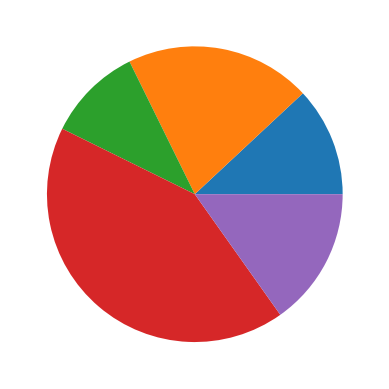

In [6]:
plt.pie(y2023)
plt.show()

In [9]:
# Aufbereitung der Beschriftung
labels = df_bundesfinanzen.columns.tolist()
print(f'Unbereinigte Labels: {labels}')
labels = labels[1:]
print(f'bereinigte Labels: {labels}')

Unbereinigte Labels: ['Jahr', 'Bildung und Forschung', 'Finanzen und Steuern', 'Sicherheit', 'Soziale Wohlfahrt', 'Verkehr']
bereinigte Labels: ['Bildung und Forschung', 'Finanzen und Steuern', 'Sicherheit', 'Soziale Wohlfahrt', 'Verkehr']


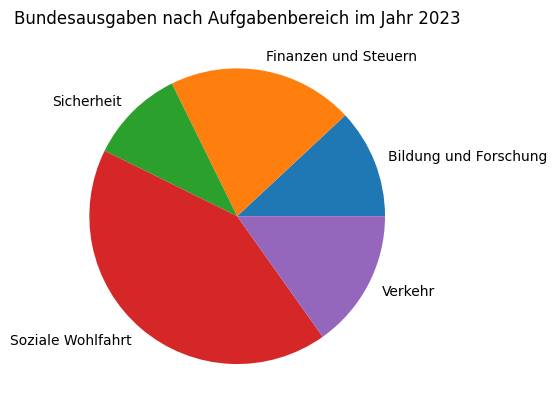

In [11]:
plt.pie(y2023, labels=labels)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

#### Farben

[Color Names](https://xkcd.com/color/rgb/)

In [28]:
colors = ['purple', 'green', 'blue', 'pink', 'red']

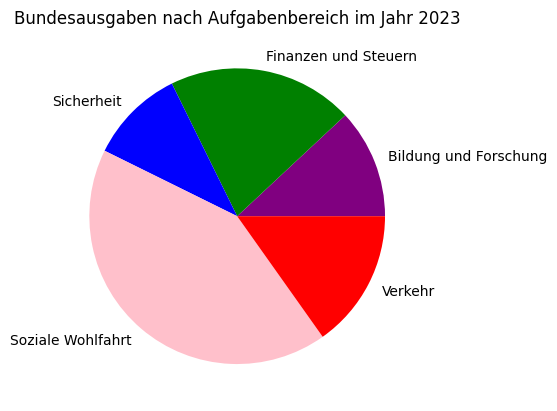

In [29]:
plt.pie(y2023, labels=labels, colors=colors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

### Tree Map

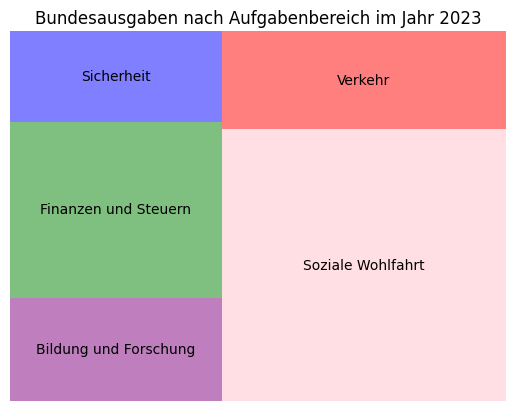

In [34]:
squarify.plot(sizes=y2023, label=labels, color=colors, alpha=0.5)
plt.axis('off')
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

#### Bar Chart

In [41]:
df = pd.DataFrame({
    'spendings':y2023,
    'labels': labels})

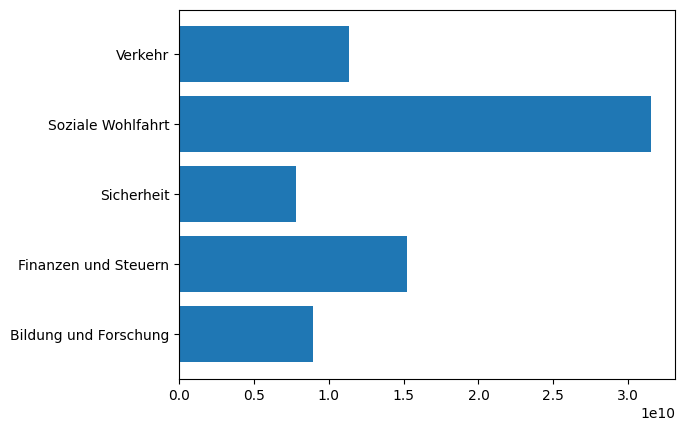

In [43]:
plt.barh(y=df.labels, width=df.spendings)
plt.show()

In [49]:
df = df.sort_values('spendings', ascending=True)
# Die Schichtung erfolgt von unten nach oben

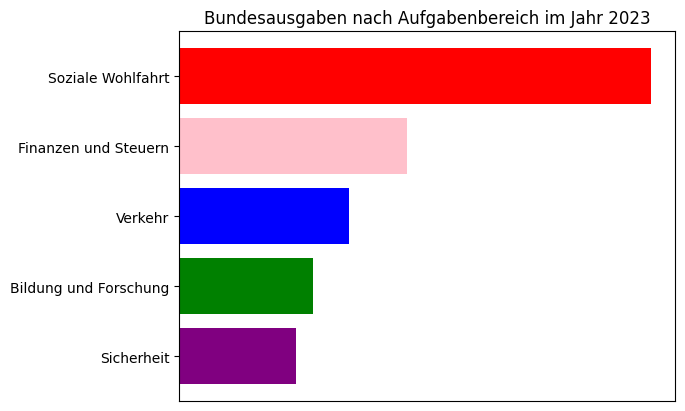

In [53]:
plt.barh(y=df.labels, width=df.spendings, color=colors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

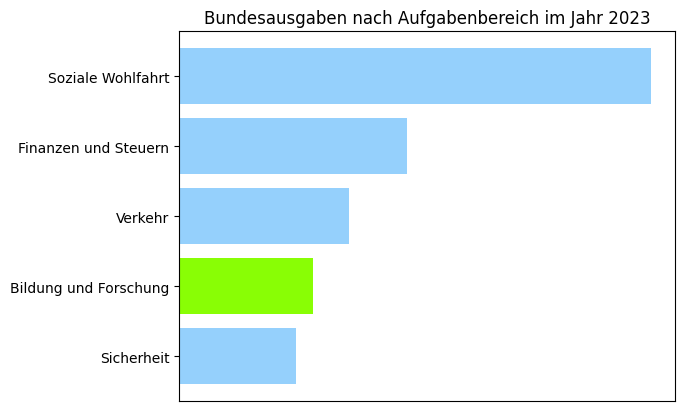

In [57]:
barcolors = ['#95d0fc', '#89fe05', '#95d0fc', '#95d0fc', '#95d0fc',]
plt.barh(y=df.labels, width=df.spendings, color=barcolors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

## Veränderungen (Timeline)

* Säulen
* Linien
* Gestapelte Flächen
* Sankey(?)

In [45]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Sicherheit 1990", "A2", "Sicherheit 2000", "B2", "Sicherheit 2010", "C2"]
      
    ),
    link = dict(
      source = [0, 0, 1, 2, 3, 3], 
      target = [2, 3, 3, 4, 4, 5],
      value =  [8, 2, 4, 8, 4, 2],

  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10,width=600, height=400)
fig.show()

## Zusammenhänge

* Scatterplot